In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning and EDA

In [2]:
file_path = 'testdf.csv'
df = pd.read_csv(file_path)

In [3]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

Dataset Shape: (2915, 6)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2915 non-null   int64 
 1   title         2915 non-null   object
 2   link          2915 non-null   object
 3   content       2894 non-null   object
 4   gold_label    2915 non-null   object
 5   news_channel  2915 non-null   object
dtypes: int64(1), object(5)
memory usage: 136.8+ KB
None

Descriptive Statistics for Numerical Columns:
                id
count  2915.000000
mean   1457.000000
std     841.632343
min       0.000000
25%     728.500000
50%    1457.000000
75%    2185.500000
max    2914.000000


In [4]:
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
id               0
title            0
link             0
content         21
gold_label       0
news_channel     0
dtype: int64


In [5]:
print("\After Dropping Missing Values per Column:")
df = df.dropna()
print(df.isnull().sum())
df.shape

\After Dropping Missing Values per Column:
id              0
title           0
link            0
content         0
gold_label      0
news_channel    0
dtype: int64


(2894, 6)

In [6]:
print("\nUnique Values in Each Categorical Column:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values in Each Categorical Column:
title: 1234 unique values
link: 1235 unique values
content: 1235 unique values
gold_label: 13 unique values
news_channel: 5 unique values


In [7]:
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Number of Duplicate Rows: 0


In [ ]:
label_mapping = {
    'sports': 'Sports',
    'Sport': 'Sports',
    'Sports': 'Sports',
    'business': 'Business',
    'Business': 'Business',
    'science-technology': 'Science-Technology',
    'Tech': 'Science-Technology',
    'Health-science': 'Science-Technology',
    'entertainment': 'Entertainment',
    'Entertainment': 'Entertainment',
    'world': 'International',
    'World': 'International',
    'Pakistan': 'Pakistan' 
}

df['gold_label'] = df['gold_label'].map(label_mapping)

print("Updated Unique Values in 'gold_label':")
print(df['gold_label'].unique())

Updated Unique Values in 'gold_label':
['Entertainment' 'Sports' 'International' 'Science-Technology' 'Business'
 'Pakistan']


In [ ]:
df = df[df["gold_label"] != "Pakistan"]

In [10]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

Dataset Shape: (2642, 6)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2642 entries, 0 to 2914
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2642 non-null   int64 
 1   title         2642 non-null   object
 2   link          2642 non-null   object
 3   content       2642 non-null   object
 4   gold_label    2642 non-null   object
 5   news_channel  2642 non-null   object
dtypes: int64(1), object(5)
memory usage: 144.5+ KB
None

Descriptive Statistics for Numerical Columns:
                id
count  2642.000000
mean   1501.054883
std     870.354115
min       0.000000
25%     681.250000
50%    1593.500000
75%    2253.750000
max    2914.000000


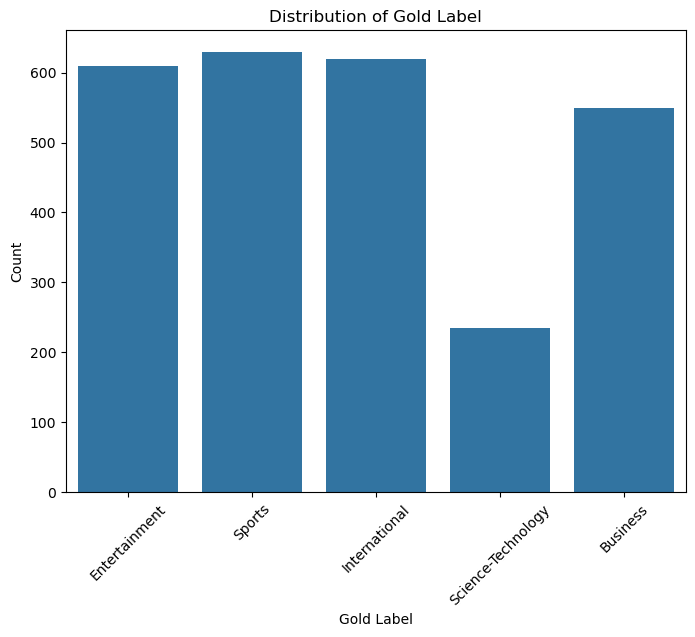

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gold_label')
plt.title('Distribution of Gold Label')
plt.xlabel('Gold Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

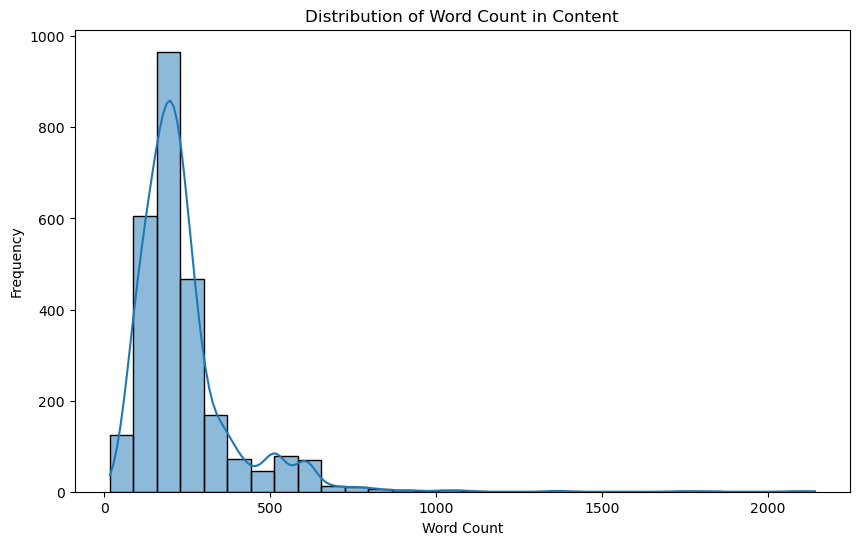

In [ ]:
df['content_word_count'] = df['content'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
plt.figure(figsize=(10, 6))
sns.histplot(df['content_word_count'], bins=30, kde=True)
plt.title('Distribution of Word Count in Content')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

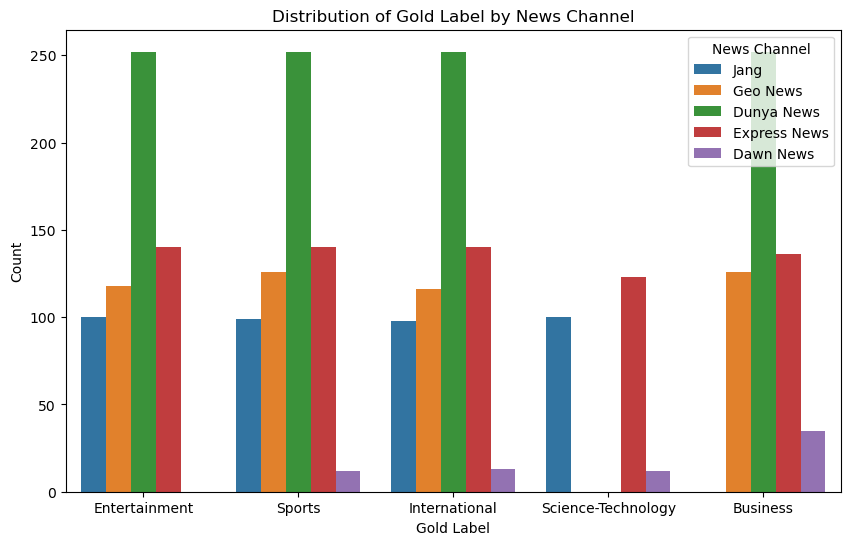

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gold_label', hue='news_channel')
plt.xlabel('Gold Label')
plt.ylabel('Count')
plt.title('Distribution of Gold Label by News Channel')
plt.legend(title='News Channel', loc='upper right')
plt.show()

In [ ]:
final_df = df.drop(columns=['news_channel', 'content_word_count'])
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2642 entries, 0 to 2914
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2642 non-null   int64 
 1   title       2642 non-null   object
 2   link        2642 non-null   object
 3   content     2642 non-null   object
 4   gold_label  2642 non-null   object
dtypes: int64(1), object(4)
memory usage: 123.8+ KB


In [15]:
final_df.to_csv('testdfcleaned.csv', index=False)